## Problem 3.1

ポテンシャルの概形を書いてみる．

$b \to \infty$の極限で北半球のポテンシャルが$V$，南半球が接地，無限遠でのポテンシャルが$V/2$に漸近するような系での球の外部領域に作るポテンシャル
$$
\begin{align}
\Phi(r,\theta) &=
V\sum_{l=0}^\infty \frac{2l+1}{2}\left(\frac ar\right)^{l+1}\left(\int_0^1\mathrm{d}x\, P_l(x)\right)P_l(\cos\theta)\\
&= V \left[
\frac{1}{2}+\sum_{k=0}^{\infty} \frac{(-1)^k(4k+3)(2k-1)!!}{2^{k+2}(k+1)!} \left(\frac ar\right)^{2k+2} P_{2k+1}(\cos\theta)
\right]\\
&=V\left[
\frac{1}{2} + \frac{3}{4}\left(\frac ar\right)^2 P_1(\cos\theta) - \frac{7}{16} \left(\frac ar\right)^4 P_3(\cos\theta) +\cdots
\right]
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import quad

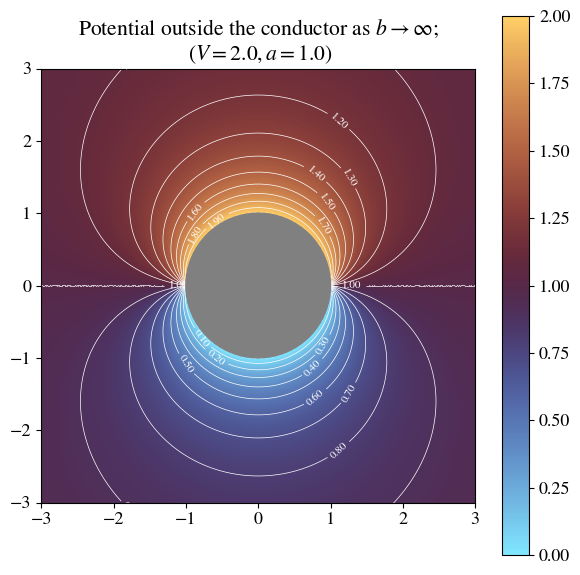

In [2]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 100# grid number per 1 unit length
rd = 1.0# radius of inner sphere
VV = 2.0# potential on the northern hemisphere
lmax = 80# number of terms

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
phi = np.full_like(xx,VV/2)

for l in range(1,lmax+1):
    P_l = sp.legendre(l)
    # ∫_0^1 dx P_l(x)
    intP_l, _ = quad(P_l, 0, 1)
    CC = VV * (2*l+1)/2 * (rd/rr)**(l+1) * intP_l

    term = CC * P_l(cos_th)
    phi += term

mask = rr<rd
phi[mask] = np.nan

#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
tle = "Potential outside the conductor as " + r"$b \to \infty$;" + '\n' + r" ($V = 2.0, a = 1.0$)"
ax.set_title(tle)

sphere = plt.Circle((0, 0), rd, color='gray', zorder=10)
ax.add_artist(sphere)


mesh=ax.pcolormesh(xx,zz,phi,vmin=0,vmax=VV,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,VV,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-1_blim.png',dpi=300,bbox_inches='tight')
plt.show()

$a \to 0$の極限でのポテンシャル

$$
\begin{align}
\Phi(r,\theta) &= V \sum_{l=0}^\infty (-1)^l \frac{2l+1}{2} \left(\frac rb\right)^l \left(\int_0^1 \mathrm{d}x\, P_l(x)\right) P_l(\cos\theta)\\
&= V \left[
\frac{1}{2}+\sum_{k=0}^{\infty} \frac{(-1)^{k+1}(4k+3)(2k-1)!!}{2^{k+2}(k+1)!} \left(\frac rb\right)^{2k+1} P_{2k+1}(\cos\theta)
\right]\\
&=V\left[
\frac{1}{2} - \frac{3}{4}\left(\frac rb\right) P_1(\cos\theta) + \frac{7}{16} \left(\frac rb\right)^3 P_3(\cos\theta) +\cdots
\right]
\end{align}
$$

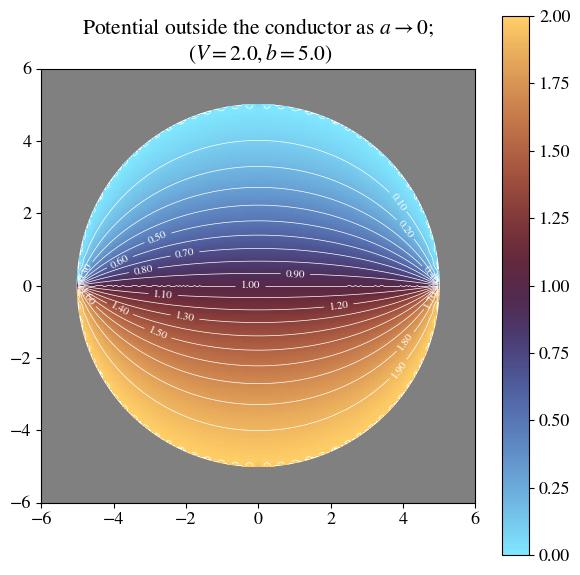

In [3]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 100# grid number per 1 unit length
rd = 5.0# radius of outer sphere
VV = 2.0# potential on the northern hemisphere
lmax = 80# number of terms

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
phi = np.full_like(xx,VV/2)

for l in range(1,lmax+1):
    P_l = sp.legendre(l)
    # ∫_0^1 dx P_l(x)
    intP_l, _ = quad(P_l, 0, 1)
    CC = VV * (-1)**l * (2*l+1)/2 * (rr/rd)**(l) * intP_l

    term = CC * P_l(cos_th)
    phi += term

mask = rr>rd
phi[mask] = np.nan

#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
tle = "Potential outside the conductor as " + r"$a \to 0$;" + '\n' + r" ($V = 2.0, b = 5.0$)"
ax.set_title(tle)

ax.set_facecolor('gray')
window=plt.Circle((0,0),rd,color='white')
ax.add_artist(window)

mesh=ax.pcolormesh(xx,zz,phi,vmin=0,vmax=VV,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,VV,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-1_alim.png',dpi=300,bbox_inches='tight')
plt.show()

$a, b$ともに極限に飛ばさない場合のポテンシャルは以下のようになる；
$$
\Phi(r,\theta) = V\sum_{l=0}^\infty \left(
\frac{(-1)^l b^{l+1}-a^{l+1}}{b^{2l+1}-a^{2l+1}}r^l + 
\frac{b^l-(-1)^la^l}{b^{2l+1}-a^{2l+1}}a^{l+1}b^{l+1} r^{-(l+1)}
\right)
\times \frac{2l+1}{2} \left(
\int_0^1 \mathrm{d}x\, P_l(x)
\right) P_l(\cos\theta)
$$

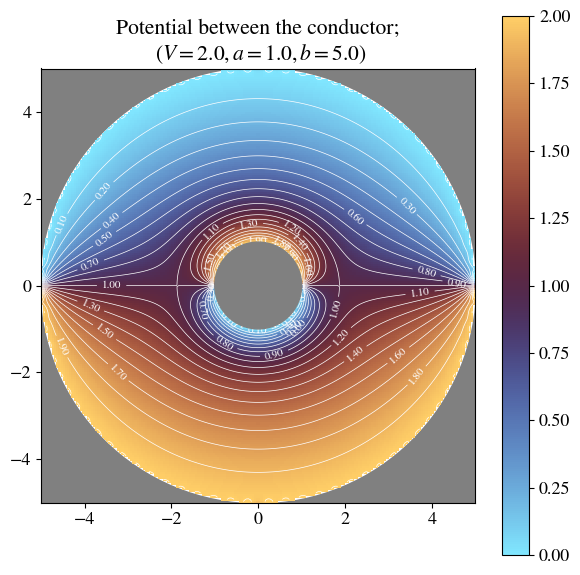

In [4]:
fig = plt.figure(figsize=(7,7))
plt.rcParams['font.size']=13
plt.rcParams['font.family']='STIXGeneral'
plt.rcParams['mathtext.fontset']='stix'

#--- initial condition(s) ---#
NN = 100# grid number per 1 unit length
aa = 1.0# radius of inner/outer sphere
bb = 5.0
VV = 2.0# potential on the northern hemisphere
lmax = 80# number of terms

#--- READY ---#
xx = np.linspace(-5*rd,5*rd,NN*10)
zz = np.linspace(-5*rd,5*rd,NN*10)
xx,zz=np.meshgrid(xx,zz)


#--- convert to polar coordinate ---#
rr = np.sqrt(xx**2+zz**2)
##xx = rr*sin(th), zz = rr*cos(th)
##→th = atan(xx/zz)
th = np.arctan2(xx,zz)
th = (th + 2*np.pi)%(2*np.pi)# convert to [0,2π] from [-π,π]
cos_th = np.cos(th)

#--- calculation ---#
phi = np.full_like(xx,0)

for l in range(0,lmax+1):
    P_l = sp.legendre(l)
    # ∫_0^1 dx P_l(x)
    intP_l, _ = quad(P_l, 0, 1)
    CC = ((-1)**l * bb**(l+1) - aa**(l+1))/(bb**(2*l+1) - aa**(2*l+1)) * rr**l \
        +(bb**l - (-1)**l * aa**l)/(bb**(2*l+1) - aa**(2*l+1)) * aa**(l+1) * bb**(l+1) * rr**(-l-1)

    term = VV * CC * (2*l+1) / 2 * intP_l * P_l(cos_th)
    phi += term

mask1 = rr>bb
mask2 = rr<aa 
phi[mask1] = np.nan
phi[mask2] = np.nan

#--- drawing ---#
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
tle = "Potential between the conductor;"  + '\n' + r" ($V = 2.0, a = 1.0, b = 5.0$)"
ax.set_title(tle)

ax.set_facecolor('gray')
window1=plt.Circle((0,0),bb,color='white')
window2=plt.Circle((0,0),aa,color='gray',zorder=10)
ax.add_artist(window1)
ax.add_artist(window2)

mesh=ax.pcolormesh(xx,zz,phi,vmin=0,vmax=VV,cmap='managua_r')
plt.colorbar(mesh)
cnt = ax.contour(xx,zz,phi,colors='white',linewidths=0.5,levels=np.linspace(0,VV,21))
ax.clabel(cnt,inline=1,fontsize=8,fmt='%.2f')

#plt.savefig('3-1_all.png',dpi=300,bbox_inches='tight')
plt.show()